In [25]:
import keras
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())
import numpy as np
import pandas as pd
from collections import defaultdict
import re


import sys
import os

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical

from keras.layers import Embedding
from keras.layers import Dense, Input, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding, Add,Concatenate, Dropout
from keras.models import Model

MAX_SEQUENCE_LENGTH = 100
MAX_NB_WORDS = 200000
EMBEDDING_DIM = 100

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13819407395793272952
]


In [26]:
def clean_str(string):
    """
    Cleaning of dataset
    """
    string = re.sub(r"\\", "", string)    
    string = re.sub(r"\'", "", string)    
    string = re.sub(r"\"", "", string)    
    return string.strip().lower()

In [27]:
import os 
os.chdir("C:\\Users\\rohan\\Desktop\\LeadingIndia.ai\\TASK3")
df1= pd.read_csv('pt1.csv')
df2= pd.read_csv('pt2.csv')
#data_valid = pd.read_csv("valid.tsv", sep='\t')
#data_test=pd.read_csv("test.tsv",sep='\t')
#data_train.head()

#data_train.columns = ['id','label','statement','subject','speaker', 'job', 'state','party','barely_true_c','false_c','half_true_c','mostly_true_c','pants_on_fire_c','venue']
 
#data_valid.columns =['id','label','statement','subject','speaker', 'job', 'state','party','barely_true_c','false_c','half_true_c','mostly_true_c','pants_on_fire_c','venue']



#data_test = ['id','label','statement','subject','speaker', 'job', 'state','party','barely_true_c','false_c','half_true_c','mostly_true_c','pants_on_fire_c','venue']


#df = pd.concat([data_train, data_valid])

data_train=df2.merge(df1, left_on='id', right_on='id')
data_train.head(20)
data_train.to_csv('data.csv')
#data_train.columns
#data_train['Label']
#data_train['Label']


#data_train=pd.read_csv("data.csv")
#data_train["Label"]
data_train.head(20)

,id,text,label
0,7.311660e+17,ðŸ”¥ca kkk grand wizard ðŸ”¥ endorses @hillary...,unverified
1,7.145990e+17,an open letter to trump voters from his top st...,unverified
2,6.918090e+17,america is a nation of second chances â€”@potu...,non-rumor
3,6.932050e+17,"brandon marshall visits and offers advice, sup...",non-rumor
4,5.511000e+17,rip elly may clampett: so sad to learn #beverl...,true
5,7.672240e+17,former 3 doors down guitarist matt roberts has...,non-rumor
6,7.155160e+17,craigslist ad: â€˜get paid $15 an hour to prot...,unverified
7,5.141060e+17,just in: missing afghan soldiers found trying ...,true
8,5.003200e+17,"the day #ferguson cops told a dirty, bloody li...",unverified
9,5.003200e+17,"the day #ferguson cops told a dirty, bloody li...",unverified


In [28]:

# Input Data preprocessing

print(data_train.columns)
print('What the raw input data looks like:')
print(data_train[0:5])
print(data_train.shape)
#data_train = data_train.drop(['Unnamed: 0'],axis = 1)
print(data_train.shape[0])

texts = []
labels = []

for i in range(data_train.shape[0]):
    text1 = data_train.id[i]
    text2 = data_train.text[i]
    
    text = str(text1) +""+ str(text2) 
    texts.append(text)
    if data_train.label[i] == 'false' :
        labels.append(0)
    elif data_train.label[i] == 'true' :
        labels.append(1)
    elif data_train.label[i] == 'unverified' : 
        labels.append(2)
    elif data_train.label[i] == 'non-rumor' : 
        labels.append(3)
    
  




Index(['id', 'text', 'label'], dtype='object')
What the raw input data looks like:
             id                                               text       label
0  7.311660e+17  ðŸ”¥ca kkk grand wizard ðŸ”¥ endorses @hillary...  unverified
1  7.145990e+17  an open letter to trump voters from his top st...  unverified
2  6.918090e+17  america is a nation of second chances â€”@potu...   non-rumor
3  6.932050e+17  brandon marshall visits and offers advice, sup...   non-rumor
4  5.511000e+17  rip elly may clampett: so sad to learn #beverl...        true
(1714, 3)
1714


In [32]:
print(labels)
print(len(labels))
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

[2, 2, 3, 3, 1, 3, 2, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2, 1, 3, 2, 0, 3, 1, 0, 3, 2, 0, 2, 2, 2, 0, 3, 0, 0, 3, 1, 1, 1, 1, 0, 2, 3, 2, 0, 3, 3, 3, 3, 2, 2, 2, 2, 2, 0, 2, 2, 3, 2, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 2, 2, 3, 3, 0, 1, 1, 1, 1, 0, 2, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 1, 2, 3, 1, 0, 1, 2, 1, 1, 2, 3, 3, 0, 2, 2, 3, 1, 1, 3, 0, 2, 2, 3, 0, 0, 3, 3, 2, 2, 2, 2, 3, 0, 3, 0, 3, 2, 2, 0, 1, 2, 2, 1, 1, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 1, 3, 2, 2, 1, 1, 1, 1, 0, 0, 2, 2, 3, 1, 1, 1, 1, 1, 3, 0, 3, 3, 3, 1, 1, 1, 1, 2, 3, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 3, 1, 2, 1, 2, 3, 3, 1, 2, 1, 1, 1, 2, 1, 0, 2, 1, 2, 3, 1, 1, 1, 1, 0, 2, 0, 1, 3, 1, 1, 0, 0, 0, 2, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 0, 1, 2, 2, 2, 2, 3, 3, 2, 2, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 3, 2, 3, 3, 1, 0, 0, 2, 0, 2, 0, 3, 0, 0, 1, 0, 3, 1, 

In [33]:
# Pad input sequences
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
labels = to_categorical(np.asarray(labels),num_classes = 4)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (1714, 100)
Shape of label tensor: (1714, 4)


In [34]:
# Train test validation Split
from sklearn.model_selection import train_test_split

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
x_train, x_test, y_train, y_test = train_test_split( data, labels, test_size=0.05, random_state=42)
x_test, x_val, y_test, y_val = train_test_split( data, labels, test_size=0.6, random_state=42)
print('Size of train, validation, test:', len(y_train), len(y_val), len(y_test))

print('real & fake news in train,valt,test:')
print(y_train.sum(axis=0))
print(y_val.sum(axis=0))
print(y_test.sum(axis=0))

Size of train, validation, test: 1628 1029 685
real & fake news in train,valt,test:
[383. 490. 385. 370.]
[234. 315. 238. 242.]
[163. 193. 169. 160.]


In [35]:
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
from matplotlib import pyplot as plt
from keras.layers import Dense, Embedding, LSTM, GRU


In [36]:
#Using Pre-trained word embeddings 
os.chdir("C:\\Users\\rohan\\Desktop\\LeadingIndia.ai")
GLOVE_DIR = "data" 
embeddings_index = {}
f = open(os.path.join(GLOVE_DIR, 'glove.6B.100d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    #print(values[1:])
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Total %s word vectors in Glove.' % len(embeddings_index))

embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
        
embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH)

Total 400000 word vectors in Glove.


In [37]:
embedding_vecor_length = 32
modell = Sequential()
modell.add(embedding_layer)
modell.add(Dropout(0.2))
modell.add(Conv1D(filters=32, kernel_size=5, padding='same', activation='relu'))
modell.add(MaxPooling1D(pool_size=2))
modell.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
modell.add(MaxPooling1D(pool_size=2))
modell.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
modell.add(BatchNormalization())
modell.add(Dense(256, activation='relu'))
modell.add(Dense(128, activation='relu'))
modell.add(Dense(64, activation='relu'))
modell.add(Dense(4, activation='softmax'))
modell.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(modell.summary())
modell.fit(x_train, y_train, epochs=10, batch_size=64)

modell.save('lstm.h5')


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          699700    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 100)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 100, 32)           16032     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 50, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 50, 64)            6208      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 25, 64)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)              

C:\ProgramData\Anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/10
1628/1628 [==============================] - 2s 1ms/step - loss: 0.5656 - accuracy: 0.7483
Epoch 2/10
1628/1628 [==============================] - 1s 652us/step - loss: 0.5465 - accuracy: 0.7525
Epoch 3/10
1628/1628 [==============================] - 1s 651us/step - loss: 0.5122 - accuracy: 0.7689
Epoch 4/10
1628/1628 [==============================] - 1s 650us/step - loss: 0.4601 - accuracy: 0.7849
Epoch 5/10
1628/1628 [==============================] - 1s 642us/step - loss: 0.4090 - accuracy: 0.8140
Epoch 6/10
1628/1628 [==============================] - 1s 637us/step - loss: 0.3615 - accuracy: 0.8329
Epoch 7/10
1628/1628 [==============================] - 1s 638us/step - loss: 0.2986 - accuracy: 0.8667
Epoch 8/10
1628/1628 [==============================] - 1s 673us/step - loss: 0.2352 - accuracy: 0.9036
Epoch 9/10
1628/1628 [==============================] - 1s 739us/step - loss: 0.1712 - accuracy: 0.9347
Epoch 10/10
1628/1628 [==============================] - 1s 709us/

In [39]:
embedding_vecor_length = 32
modelg = Sequential()
modelg.add(embedding_layer)
modelg.add(GRU(100, dropout=0.2, recurrent_dropout=0.2))
###
modelg.add(BatchNormalization())
###
modelg.add(Dense(4, activation='softmax'))
modelg.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(modelg.summary())
modelg.fit(x_train, y_train, epochs=2, batch_size=64)
modelg.save('gru.h5')


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          699700    
_________________________________________________________________
gru_2 (GRU)                  (None, 100)               60300     
_________________________________________________________________
batch_normalization_3 (Batch (None, 100)               400       
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 404       
Total params: 760,804
Trainable params: 760,604
Non-trainable params: 200
_________________________________________________________________
None


C:\ProgramData\Anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/2
1628/1628 [==============================] - 3s 2ms/step - loss: 0.7251 - accuracy: 0.6958
Epoch 2/2
1628/1628 [==============================] - 3s 2ms/step - loss: 0.7072 - accuracy: 0.6921


Correct predictions: 673.0
Total number of test examples: 685
Accuracy of model1:  0.9824817518248176


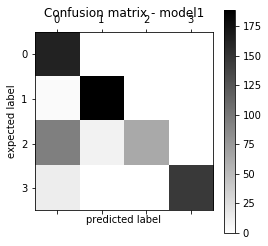

In [40]:
# Test model 1
import matplotlib.pyplot as plt
import seaborn as sns
test_preds = modell.predict(x_test)
test_preds = np.round(test_preds)
correct_predictions = float(sum(test_preds == y_test)[0])
print("Correct predictions:", correct_predictions)
print("Total number of test examples:", len(y_test))
print("Accuracy of model1: ", correct_predictions/float(len(y_test)))

# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
x_pred = modell.predict(x_test)
x_pred = np.round(x_pred)
x_pred = x_pred.argmax(1)
y_test_s = y_test.argmax(1)
cm = confusion_matrix(y_test_s, x_pred)
plt.matshow(cm, cmap=plt.cm.binary, interpolation='nearest')
plt.title('Confusion matrix - model1')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')
plt.show()
#sns.set(font_scale=1.4)#for label size
#sns.heatmap(cm,annot=True,annot_kws={"size": 16},fmt='1f')# font size


Correct predictions: 522.0
Total number of test examples: 685
Accuracy of model1:  0.762043795620438


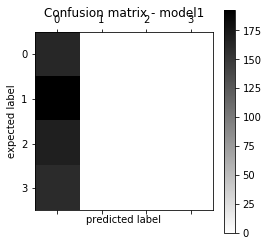

In [41]:
# Test model 2
import matplotlib.pyplot as plt
import seaborn as sns
test_preds = modelg.predict(x_test)
test_preds = np.round(test_preds)
correct_predictions = float(sum(test_preds == y_test)[0])
print("Correct predictions:", correct_predictions)
print("Total number of test examples:", len(y_test))
print("Accuracy of model1: ", correct_predictions/float(len(y_test)))

# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
x_pred = modelg.predict(x_test)
x_pred = np.round(x_pred)
x_pred = x_pred.argmax(1)
y_test_s = y_test.argmax(1)
cm = confusion_matrix(y_test_s, x_pred)
plt.matshow(cm, cmap=plt.cm.binary, interpolation='nearest')
plt.title('Confusion matrix - model1')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')
plt.show()
#sns.set(font_scale=1.4)#for label size
#sns.heatmap(cm,annot=True,annot_kws={"size": 16},fmt='f')# font size